# CS 1656 – Introduction to Data Science

## Instructor: Alexandros Labrinidis
### Teaching Assistant: Evangelos Karageorgos
### Additional credits: Xiaoting Li, Tahereh Arabghalizi, Zuha Agha, Anatoli Shein, Phuong Pham
## Recitation 8: Networks in Python
---

This recitation focuses on managing and querying graphs. We will use material from https://networkx.github.io/documentation/stable/tutorial.html 

In [2]:
import networkx as nx

Let's first create a simple unidirectional graph

In [3]:
G = nx.Graph()

Let's add two nodes, labeled 4 and 8

In [4]:
G.add_node(4)
G.add_node(8)

Let's add an edge connecting these two nodes

In [5]:
G.add_edge(4,8)

Let's see what we have done.

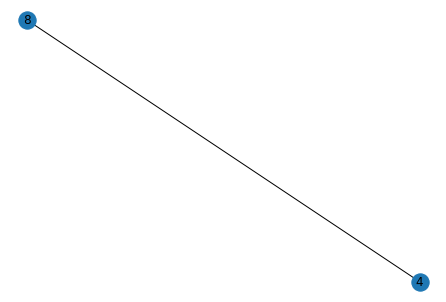

In [6]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

We can also add nodes and edges in bulk

In [7]:
mynodes = [1,2,3,4,5,6,7,8]
myedges = [(1,2),(3,4),(5,6),(7,8), (4,8)]
G.add_nodes_from(mynodes)
G.add_edges_from(myedges)

Let's see what we have.

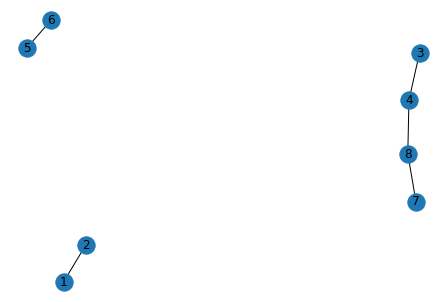

In [8]:
nx.draw(G, with_labels=True)
plt.show()

Some simple statistics on our graph

In [9]:
print ("Number of nodes:",G.number_of_nodes())
print ("Number of edges:",G.number_of_edges())


Number of nodes: 8
Number of edges: 5


Let's see a list of all the nodes and of all the edges.

In [10]:
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))

Nodes: [4, 8, 1, 2, 3, 5, 6, 7]
Edges: [(4, 8), (4, 3), (8, 7), (1, 2), (5, 6)]


We can also get the lists of edges from a specific node or specific nodes.

In [11]:
print("Edges in/out of node 4:", list(G.edges(4)))

Edges in/out of node 4: [(4, 8), (4, 3)]


In [12]:
print("Edges in/out of nodes 4 and 5:", list(G.edges([4,5])))

Edges in/out of nodes 4 and 5: [(4, 8), (4, 3), (5, 6)]


Let's add a few more edges, to make it more interesting.

In [13]:
myedges2 = [(1,3),(1,4),(2,5),(2,6),(2,7),(2,8)]
G.add_edges_from(myedges2)

In [14]:
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))

Nodes: [4, 8, 1, 2, 3, 5, 6, 7]
Edges: [(4, 8), (4, 3), (4, 1), (8, 7), (8, 2), (1, 2), (1, 3), (2, 5), (2, 6), (2, 7), (5, 6)]


In [15]:
print("Nodes adjacent to node 1:", list(G.adj[1]))

Nodes adjacent to node 1: [2, 3, 4]


In [16]:
print("Nodes neighboring to node 1:", list(G.neighbors(1)))  # Same as .adj[]

Nodes neighboring to node 1: [2, 3, 4]


In [17]:
print("Degree of node 1:", G.degree(1))

Degree of node 1: 3


In [18]:
print("Degree of nodes 1,2:", G.degree([1,2]))

Degree of nodes 1,2: [(1, 3), (2, 5)]


Add an attribute to every node in the graph.

In [19]:
for i in list(G.nodes()):
    print ("Node:",i)
    G.nodes[i]['color'] = 'Blue'
    print ("Node:",G.nodes[i])

Node: 4
Node: {'color': 'Blue'}
Node: 8
Node: {'color': 'Blue'}
Node: 1
Node: {'color': 'Blue'}
Node: 2
Node: {'color': 'Blue'}
Node: 3
Node: {'color': 'Blue'}
Node: 5
Node: {'color': 'Blue'}
Node: 6
Node: {'color': 'Blue'}
Node: 7
Node: {'color': 'Blue'}


Let's now create a directed graph.

In [20]:
DG = nx.DiGraph()
newnodes = (1,2,3,4,5,6)
newedges = [(1,2),(2,3),(3,4),(4,3),(4,5),(5,6),(4,6),(3,6),(6,2)]
DG.add_nodes_from(newnodes)
DG.add_edges_from(newedges)
print("Nodes:", list(DG.nodes()))
print("Edges:", list(DG.edges()))

Nodes: [1, 2, 3, 4, 5, 6]
Edges: [(1, 2), (2, 3), (3, 4), (3, 6), (4, 3), (4, 5), (4, 6), (5, 6), (6, 2)]


Let's print the directed graph. Note the thicker parts at the edges, indicating arrows.

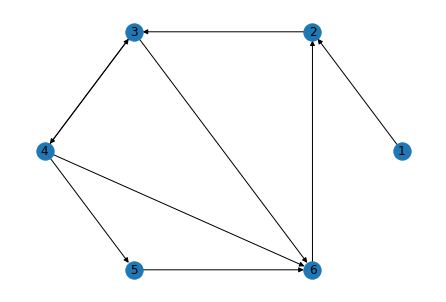

In [21]:
nx.draw_shell(DG, with_labels=True)
plt.show()

Networkx supports many different algorithms, directly on the specified graphs. For more information go to https://networkx.github.io/documentation/stable/reference/algorithms/traversal.html

Let's do a breadth-first traversal of the graph above, starting from node 1.

In [22]:
root = 1
all_edges = nx.bfs_edges(DG,root)  # all edges during breadth-first traversal of graph, starting at root
print ("all_edges:",all_edges)

print ("list(all_edges) #1:", list(all_edges))

print ("list(all_edges) #2:", list(all_edges))

all_edges = nx.bfs_edges(DG,root) # REDO
edgelist = list(all_edges)
print ("Edge List #1:",edgelist)
print ("Edge List #2:",edgelist)

all_edges: <generator object bfs_edges at 0x000002234F539660>
list(all_edges) #1: [(1, 2), (2, 3), (3, 4), (3, 6), (4, 5)]
list(all_edges) #2: []
Edge List #1: [(1, 2), (2, 3), (3, 4), (3, 6), (4, 5)]
Edge List #2: [(1, 2), (2, 3), (3, 4), (3, 6), (4, 5)]


In [23]:
print (dict(nx.bfs_successors(DG,root)))

{1: [2], 2: [3], 3: [4, 6], 4: [5]}


## Tasks
You should do the following tasks on your own.

**Task 1**
Given the following code that generates three different graphs (graph1, graph2, graph3), compute the degree for each node and report the highest and the lowest degree over all nodes for each of the graphs.

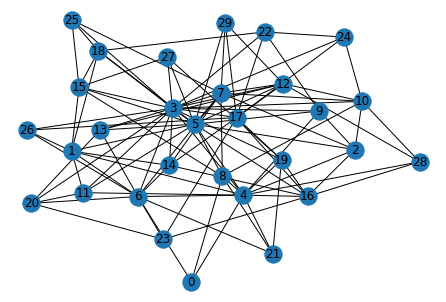

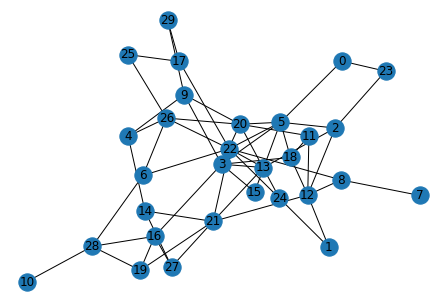

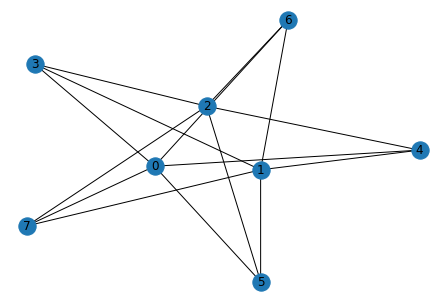

In [24]:
graph1 = nx.barabasi_albert_graph(30, 4)
nx.draw(graph1, with_labels=True)
plt.show()

graph2 = nx.erdos_renyi_graph(30, 0.15)
nx.draw(graph2, with_labels=True)
plt.show()

graph3 = nx.complete_bipartite_graph(3, 5)
nx.draw(graph3, with_labels=True)
plt.show()

Write your code here:

In [25]:
def printMinMax(G, s):
    max_deg = 0 #start with small number
    min_deg = 10000000 #start off with REALLY BIG NUMBER
    for node in G.nodes():
        if G.degree(node) >= max_deg:
            max_deg = G.degree(node)
        if G.degree(node) <= min_deg:
            min_deg = G.degree(node)
    max_formatter = 'Max Degree for {}: {}'.format(s, max_deg)
    min_formatter = 'Min Degree for {}: {}'.format(s, min_deg)
    print(max_formatter)
    print(min_formatter,'\n')
def printDegrees(G, s):
    for node in G.nodes():
        formatter = 'Degree of Node {} in {} is: {}'.format(node, s, G.degree(node))
        print(formatter)
    print('\n')
#Calculate and print our respective min and max degrees for respective graphs:
print("=======Printing Degrees of Nodes in Graph 1:===============")
printDegrees(graph1, 'Graph 1')
print("=====Printing Max Degree and Min Degree of Graph 1====")
printMinMax(graph1, 'Graph 1')
print("=======Printing Degrees of Nodes in Graph 2===============")
printDegrees(graph2, 'Graph 2')
print("=====Printing Max Degree and Min Degree of Graph 2====")
printMinMax(graph2, 'Graph 2')
print("=======Printing Degrees of Nodes in Graph 3==============")
printDegrees(graph3, 'Graph 3')
print("=====Printing Max Degree and Min Degree of Graph 3=====")
printMinMax(graph3, 'Graph 3')

=======Printing Degrees of Nodes in Graph 1:===============
Degree of Node 0 in Graph 1 is: 3
Degree of Node 1 in Graph 1 is: 8
Degree of Node 2 in Graph 1 is: 6
Degree of Node 3 in Graph 1 is: 20
Degree of Node 4 in Graph 1 is: 13
Degree of Node 5 in Graph 1 is: 15
Degree of Node 6 in Graph 1 is: 11
Degree of Node 7 in Graph 1 is: 10
Degree of Node 8 in Graph 1 is: 7
Degree of Node 9 in Graph 1 is: 5
Degree of Node 10 in Graph 1 is: 7
Degree of Node 11 in Graph 1 is: 5
Degree of Node 12 in Graph 1 is: 8
Degree of Node 13 in Graph 1 is: 5
Degree of Node 14 in Graph 1 is: 6
Degree of Node 15 in Graph 1 is: 7
Degree of Node 16 in Graph 1 is: 8
Degree of Node 17 in Graph 1 is: 10
Degree of Node 18 in Graph 1 is: 6
Degree of Node 19 in Graph 1 is: 6
Degree of Node 20 in Graph 1 is: 5
Degree of Node 21 in Graph 1 is: 4
Degree of Node 22 in Graph 1 is: 5
Degree of Node 23 in Graph 1 is: 4
Degree of Node 24 in Graph 1 is: 4
Degree of Node 25 in Graph 1 is: 4
Degree of Node 26 in Graph 1 is: 4

**Task 2**
Create a directional graph with 5 nodes and 10 edges. Make sure to include at least one node that has a single outgoing edge and no incoming edges.

Nodes: [1, 2, 3, 4, 5, 6]
Edges: [(1, 2), (2, 3), (3, 4), (3, 6), (4, 3), (4, 5), (4, 6), (5, 6), (6, 2)]


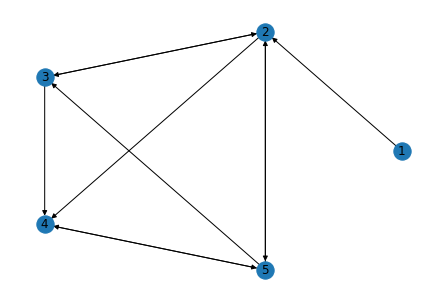

In [26]:
digraph = nx.DiGraph()
newnodes = (1,2,3,4,5)
newedges = [(1,2),(2,3),(2,4),(2,5),(3,2),(3,4),(4,5),(5,2),(5,3),(5,4)]
digraph.add_nodes_from(newnodes)
digraph.add_edges_from(newedges)
print("Nodes:", list(DG.nodes()))
print("Edges:", list(DG.edges()))
articulation_point = 1 #this is the single node with a single outward edge and no inward edge.
nx.draw_shell(digraph, with_labels=True)
plt.show()

**Task 3**
For each node in the graph that you generated in task 2, compute how many nodes are reachable using a BFS traversal starting at that node. Report these for all nodes in the graph. 

In [36]:
def perform_bfs(digraph, articulation_point):
    all_edges = nx.bfs_edges(digraph, articulation_point)
    edgelist = list(all_edges)

    # Compact version
    nodes = [articulation_point] + [v for u, v in edgelist]
    print(nodes)
    print(dict(nx.bfs_successors(digraph, articulation_point)))
    return len(nodes)

for node in digraph.nodes():
    print("Performing BFS from Node {}:".format(node))
    print("The number of nodes reachable from the Starting Node {}, excluding the Starting Node is: {}".format(node, perform_bfs(digraph, node)-1))

Performing BFS from Node 1:
[1, 2, 3, 4, 5]
{1: [2], 2: [3, 4, 5]}
The number of nodes reachable from the Starting Node 1, excluding the Starting Node is: 4
Performing BFS from Node 2:
[2, 3, 4, 5]
{2: [3, 4, 5]}
The number of nodes reachable from the Starting Node 2, excluding the Starting Node is: 3
Performing BFS from Node 3:
[3, 2, 4, 5]
{3: [2, 4], 2: [5]}
The number of nodes reachable from the Starting Node 3, excluding the Starting Node is: 3
Performing BFS from Node 4:
[4, 5, 2, 3]
{4: [5], 5: [2, 3]}
The number of nodes reachable from the Starting Node 4, excluding the Starting Node is: 3
Performing BFS from Node 5:
[5, 2, 3, 4]
{5: [2, 3, 4]}
The number of nodes reachable from the Starting Node 5, excluding the Starting Node is: 3
